### 05-3 트리의 앙상블
#### - 정형데이터(structured data): 구조가 있는 데이터 ex) csv, 데이터베이스, 엑셀
#### - 비정형데이터(unstructured data) ex) 텍스트 데이터, 사진, 디지털 음악 등
#### - 앙상블 학습(ensemble learning): 대부분 결정트리를 기반으로 만들어짐
#### - 앙상블 학습의 종류: 배깅, 부스팅, 랜덤 포레스트

#### * 랜덤 포레스트(Random Forest) : 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만드는 알고리즘
#### - 데이터셋 준비
####                -> 각 트리를 훈련하기 위해 데이터를 랜덤하게 만드는데, 방법이 독특 
####                -> 부트스트랩 샘플(bootstrap sample): 1000개의 샘플에서 100를 뽑는다면 1개를 뽑고, 뽑았던 1개를 다시 넣음 -> 이렇게 100개를 가방에서 뽑음 (중복된 허용)
####                -> 노드 분할시: 전체 feature 중에 일부 feature를 무작위로 골라 이 중에서 최선의 분할을 찾음
####                -> RandomForestClassifier(): 기본적으로 전체 feature의 개수의 제곱근만큼의 feature 선택  ex) 4개의 feature가 있으면 노드마다 2개의 랜덤 feature 사용 (회귀모델은 전체 feature사용)
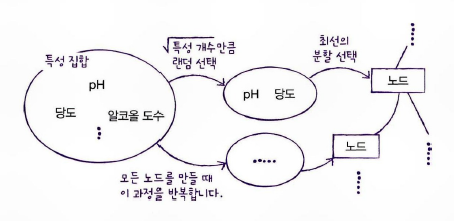
#### - 랜덤하게 선택한 샘플과 feature를 사용하기 때문에 훈련 세트에 과대적합 되는 것을 막아주고, 검증세트와 테스트세트에서 안정적인 성능을 얻을 수 있음

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('http://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar','pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size= 0.2, random_state=42)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs= -1, random_state= 42)
score = cross_validate (rf, train_input, train_target,
                        return_train_score= True, n_jobs= -1)
print(np.mean(score['train_score']), np.mean(score['test_score']))

# 훈련세트점수 > 테스트점수 : 과대적합

0.9973541965122431 0.8905151032797809


In [ ]:
# feature의 중요도

rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [ ]:
# OOB(out of bag): 부트스트랩 샘플에 해당하지 않고 남은 샘플  -> 브트스트랩 샘프로 훈련한 결정 트리를 평가하는  validation 세트로 활용
# RandomForestClassifierdml의 oob_score의 기본값이 False이기 때문에 True로 지정 

rf = RandomForestClassifier (oob_score=True, n_jobs= -1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


### 엑스트라 트리(Extra Trees)
#### * 랜덤 포레스트와 공통점
#### - 100개의 결정 트리 훈련
#### - 결정 트리가 제공하는 대부분의 매개변수 활용 가능
#### - 전체 feature중 일부 feature를 랜덤하게 선택하여 노드 분할 하는데 
#### # 랜덤 포레스트와 차이점
#### - 부트스트랩을 사용하지 않음
#### - 결정트리를 만들때 전체 훈련 세트를 사용
#### - 노드 분할 시 가장 좋은 분할을 찾는 것이 아니라 무작위 분할 
#### # 엑스트라 트리의 장점 
#### - 많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증 세트의 점수를 높이는 효과
#### - 사이킷런에서 제공하는 엑스트라 트리 ExtraTreesClassifier 

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier (n_jobs= -1, random_state= 42)
scores= cross_validate(et, train_input, train_target,
                       return_train_score= True, n_jobs= -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
# feature의 중요도

et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


### 그래디언트 부스팅(Gradient Boosting)
#### - 깊이가 얕은 결정 트리를 사용해서 이전 트리의 오차 보완 
#### - 사이킷런의 그래디언트 부스팅은 기본적으로 깊이 3인 결정트리를 100개 사용
#### - 깊이가 얕은 결정 트리를 사용하여 과대적합에 강함, 높은 일반화 성능 
#### - 경사하강법을 사용해서 트리를 앙상블에 적용: 분류(로지스틱 함수 이용),  회귀(평균 제곱 오차 함수 사용)
#### - 학습률 매개변수로 속도를 조절

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
scores = cross_validate (gb, train_input, train_target,
                         return_train_score=True, n_jobs= -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8718505219515806


In [16]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,
                                random_state=42)
scores = cross_validate (gb, train_input, train_target,
                         return_train_score=True, n_jobs= -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [17]:
gb.fit(train_input,train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


### 히스토그램 기반 그래디언트 부스팅(Histogram-based Gradient Boosting)
#### - 과대적합을 잘 억제하면서 그레이디언트 부스팅보다 조금 더 높은 성능 제공
#### - feature importance는 permutation importance로 측정


In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb= HistGradientBoostingClassifier()
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [20]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input,train_target,
                                n_repeats=10, random_state=42, n_jobs= -1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [21]:
result = permutation_importance(hgb, test_input,test_target,
                                n_repeats=10, random_state=42, n_jobs= -1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [22]:
hgb.score(test_input, test_target)

0.8723076923076923

In [ ]:
# XGBoost : 그래디언트 부스팅 알고리즘 라이브러리 

from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True, n_jobs= -1)
print(np.mean(scores['train_score']), np.mean(score['test_score']))

0.9567059184812372 0.8905151032797809


/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014'

In [ ]:
# LightGBM : 그래디언트 부스팅 알고리즘 라이브러리 


from lightgbm import LGBMClassifier
lgb=LGBMClassifier(random_state=42)
scores= cross_validate(lgb, train_input, train_target,
                       return_train_score=True, n_jobs= -1)
print(np.mean(scores['train_score']), np.mean(score['test_score']))

[LightGBM] [Info] Number of positive: 3151, number of negative: 1007
[LightGBM] [Info] Number of positive: 3152, number of negative: 1006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.758057 -> initscore=1.142055
[LightGBM] [Info] Start training from score 1.142055
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757816 -> initscore=1.140744
[LightGBM] [Inf